<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [152]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [153]:
subset_shopping = shopping_data[shopping_data['Month'].isin(['Nov','Dec'])].copy()
shopping_data.shape, subset_shopping.shape

((12055, 15), (4450, 15))

In [154]:
rates = subset_shopping.groupby('CustomerType')['Purchase'].sum() / subset_shopping.groupby('CustomerType')['SessionID'].count()
rates

CustomerType
New_Customer          0.273352
Returning_Customer    0.195594
dtype: float64

In [155]:
purchase_rates = {'Returning_Customer': rates[1], 'New_Customer': rates[0] }
purchase_rates

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}

In [156]:
subset_shopping['Administrative_Duration'].corr(subset_shopping['ProductRelated_Duration']), subset_shopping['Administrative_Duration'].corr(subset_shopping['Informational_Duration'])

(0.3898546003206963, 0.24468855792839267)

In [157]:
top_correlation = {
    "pair": ("Administrative_Duration", "ProductRelated_Duration"),
    "correlation": subset_shopping['Administrative_Duration'].corr(subset_shopping['ProductRelated_Duration'])
}

In [163]:
# Parameters
n = 500  # total sessions
p = float(purchase_rates['Returning_Customer']) + 0.15 # boosted purchase rate
x = 100  # threshold

# Probability of at least 100 sales: 1 - P(X < 100) = 1 - binom.cdf(99, n, p)
prob_at_least_100_sales = 1 - binom.cdf(x - 1, n, p)

print(f"Probability of at least 100 sales: {prob_at_least_100_sales:.4f}")

Probability of at least 100 sales: 1.0000


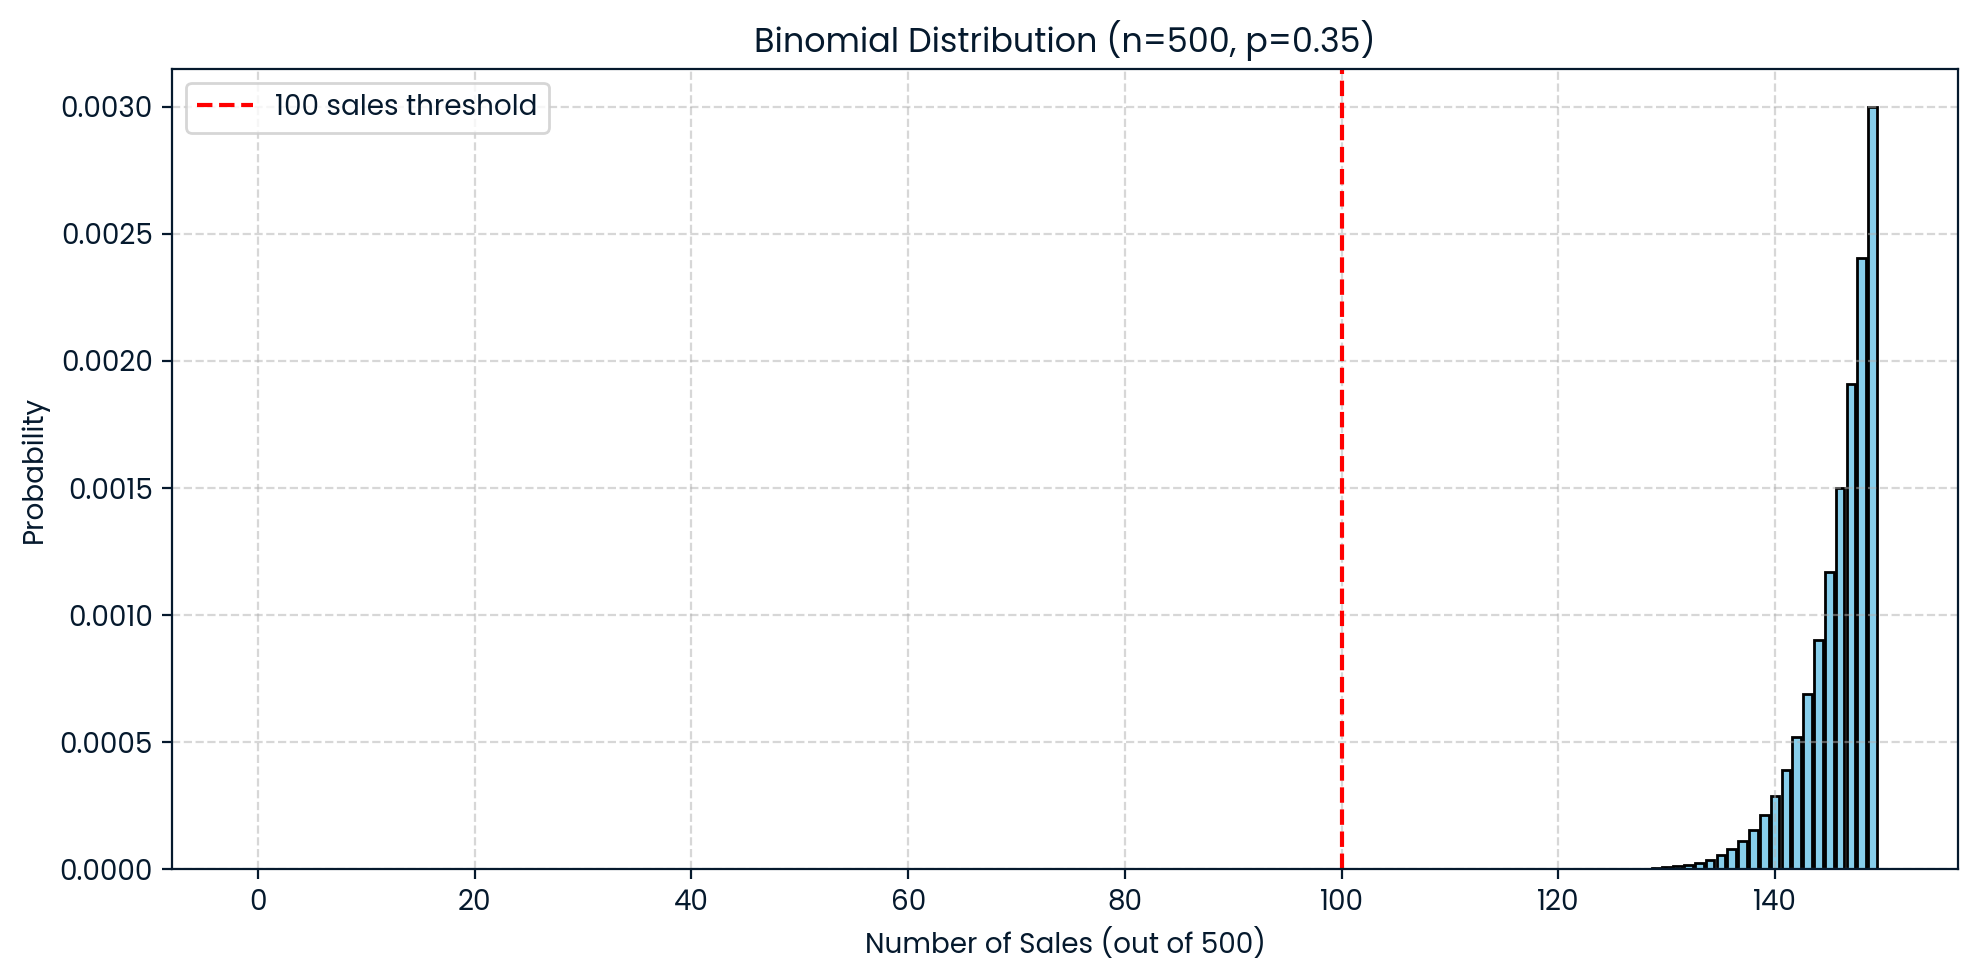

In [164]:
# Optional: plot the binomial distribution
x_vals = np.arange(0, 150)
pmf_vals = binom.pmf(x_vals, n, p)

plt.figure(figsize=(10, 5))
plt.bar(x_vals, pmf_vals, color='skyblue', edgecolor='black')
plt.axvline(x=100, color='red', linestyle='--', label='100 sales threshold')
plt.title(f"Binomial Distribution (n={n}, p={p:.2f})")
plt.xlabel("Number of Sales (out of 500)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()